# The Dying ReLU problem

In [41]:
# Importing the necessary packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# We load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [44]:
# We preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [43]:
# We define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

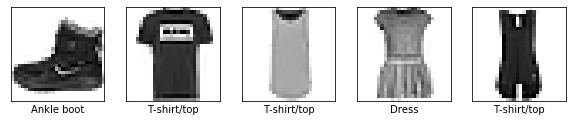

In [45]:
# Visulizing the images
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [46]:
# We build the first model that will suffer from the dying relu problem 
# The biases are initialized to high negative values
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
        units=128,
        kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
        bias_initializer=tf.keras.initializers.Constant(-100),
        activation='relu',
        name='dense1'
    ),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

In [47]:
# We compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',
              metrics=['accuracy'])

In [48]:
# We train it
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, verbose=0)

Train: 0.100, Test: 0.100


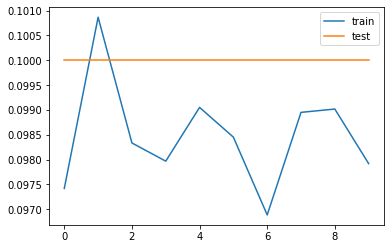

In [49]:
# We evaluate the model
_, train_acc = model.evaluate(train_images, train_labels, verbose=0)
_, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [50]:
# We check that the dying relu is what prevented the model from learning 
layer = model.get_layer('dense1')
weights = layer.get_weights()[1]
print('We have ', np.count_nonzero(weights <= 0), ' negative weights out of', len(weights))

We have  128  negative weights out of 128


In [51]:
# We build the new model that have a Leaky ReLu activation layer instead of ReLu
# We keep the same initializations as before
not_dying_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
        units=128,
        kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
        bias_initializer=tf.keras.initializers.Constant(-50),
        name='dense1'
    ),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

In [52]:
not_dying_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',
              metrics=['accuracy'])

In [53]:
not_dying_history = not_dying_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, verbose=0)

Train: 0.860, Test: 0.841


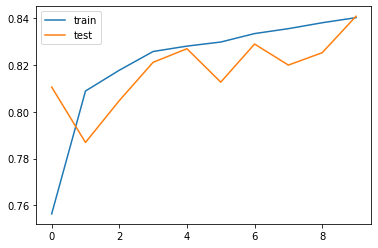

In [54]:
# evaluating the model
_, train_acc = not_dying_model.evaluate(train_images, train_labels, verbose=0)
_, test_acc = not_dying_model.evaluate(test_images, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(not_dying_history.history['accuracy'], label='train')
plt.plot(not_dying_history.history['val_accuracy'], label='test')
plt.legend()
plt.show()